# 이웃집 토토치 파이토치 : Day 2 - 추가 실습
---

<div class="alert alert-info">
    <h4>Q1</h4>
    <p> 다음 코드는 keras를 이용한 mnist 손글씨 분류기를 학습시키는 과정을 나타내고 있다. 아래의 코드와 동등한 역할을 수행할 수 있는 코드를 pytorch를 이용하여 작성하라.</p>
</div>

- keras 코드

In [1]:
def show_hist_plot(acc, val_acc, loss, val_loss):
    import matplotlib.pyplot as plt

    fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(12, 4))

    loss_ax.plot(loss, 'b', label='train loss')
    loss_ax.plot(val_loss, 'r', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')

    acc_ax.plot(acc, 'b', label='train acc')
    acc_ax.plot(val_acc, 'r', label='val acc')
    acc_ax.set_ylabel('accuracy')
    acc_ax.set_xlabel('epoch')
    acc_ax.legend(loc='upper left')

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)        

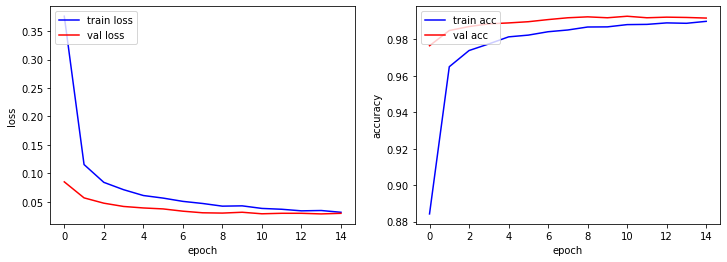

In [2]:
# 코드 출처 : https://keras.io/examples/vision/mnist_convnet/

########################################################### 
# Setup
###########################################################
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


########################################################### 
# Prepare the data
###########################################################
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples\n")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


########################################################### 
# Build the model
###########################################################
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()
print()

########################################################### 
# Train the model
###########################################################
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
show_hist_plot(hist.history['accuracy'], hist.history['val_accuracy'], 
               hist.history['loss'], hist.history['val_loss'])
print()

########################################################### 
# Evaluate the trained model
###########################################################
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

- 여기부터 작성 해주세요

In [3]:
########################################################### 
# Setup
###########################################################
import torch
import torchvision

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
########################################################### 
# Prepare the data
###########################################################
from torchvision.transforms import ToTensor, Lambda
from sklearn.model_selection import train_test_split
import numpy as np

num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
# Scale images to the [0, 1] range
preprocess = Lambda(lambda x: x.float())
train_data = torchvision.datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=preprocess
)

 
test_data = torchvision.datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=preprocess
)

(x_train, y_train), (x_test, y_test) = (train_data.data, train_data.targets), (test_data.data, test_data.targets)

# Make sure images have shape (1, 28, 28)
x_train = x_train.view(-1, 1, 28, 28)
x_test = x_test.view(-1, 1, 28, 28)


print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples\n")
print("-------------------------------------")
                       
# convert class vectors to binary class matrices
# Pytorch에서 사용되는 CrossEntropy는 one-hot encoding 형태를 지원하지 않기 때문에 해당과정을 생략합니다.


# train 중 10%를 validaiton set으로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)
print(x_train.shape[0], "train samples")
print(x_val.shape[0], "valid samples")
print(x_test.shape[0], "test samples\n")

train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
valid_dataset = torch.utils.data.TensorDataset(x_val, y_val)
test_dataset = torch.utils.data.TensorDataset(x_test, y_test)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

x_train shape: torch.Size([60000, 1, 28, 28])
60000 train samples
10000 test samples

-------------------------------------
54000 train samples
6000 valid samples
10000 test samples



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
########################################################### 
# Build the model
###########################################################
import torch.nn as nn
from torchsummary import summary
import time

model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=0),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Dropout(0.5),
    nn.Linear(1600, 10)
#     nn.Softmax(dim=1)
).to(device)


summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
              ReLU-2           [-1, 32, 26, 26]               0
         MaxPool2d-3           [-1, 32, 13, 13]               0
            Conv2d-4           [-1, 64, 11, 11]          18,496
              ReLU-5           [-1, 64, 11, 11]               0
         MaxPool2d-6             [-1, 64, 5, 5]               0
           Flatten-7                 [-1, 1600]               0
           Dropout-8                 [-1, 1600]               0
            Linear-9                   [-1, 10]          16,010
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.53
Params size (MB): 0.13
Estimated Total Size (MB): 0.66
---------------------------------------------

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 1/15
loss: 0.62673 - accuracy: 0.88548 - val_loss: 0.19831 - val_accuracy: 0.94200

Epoch 2/15
loss: 0.15051 - accuracy: 0.95424 - val_loss: 0.13611 - val_accuracy: 0.95733

Epoch 3/15
loss: 0.12847 - accuracy: 0.96161 - val_loss: 0.14506 - val_accuracy: 0.95583

Epoch 4/15
loss: 0.11301 - accuracy: 0.96615 - val_loss: 0.12162 - val_accuracy: 0.96633

Epoch 5/15
loss: 0.10261 - accuracy: 0.96870 - val_loss: 0.12961 - val_accuracy: 0.96400

Epoch 6/15
loss: 0.09917 - accuracy: 0.97033 - val_loss: 0.12791 - val_accuracy: 0.96417

Epoch 7/15
loss: 0.08728 - accuracy: 0.97406 - val_loss: 0.10407 - val_accuracy: 0.97217

Epoch 8/15
loss: 0.07773 - accuracy: 0.97580 - val_loss: 0.11211 - val_accuracy: 0.96983

Epoch 9/15
loss: 0.07100 - accuracy: 0.97780 - val_loss: 0.09954 - val_accuracy: 0.97150

Epoch 10/15
loss: 0.06602 - accuracy: 0.97928 - val_loss: 0.10631 - val_accuracy: 0.97283

Epoch 11/15
loss: 0.06451 - accuracy: 0.98031 - val_loss: 0.10767 - val_accuracy: 0.97167

Epoch 12

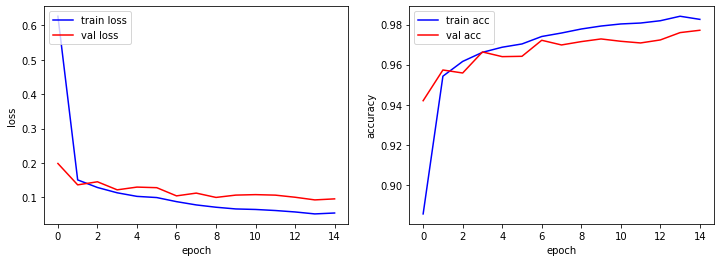

In [7]:
########################################################### 
# Train the model
###########################################################
batch_size = 128
epochs = 15

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    total_loss, total_acc = 0, 0
    
    for batch, (X, y) in enumerate(dataloader):
        # 예측(prediction)과 손실(loss) 계산
        X, y = X.to(device).float(), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # train loss, train acc 계산
        with torch.no_grad():
            pred = model(X)
            total_loss += loss_fn(pred, y).item()
            total_acc += (pred.argmax(1) == y).type(torch.float).sum().item()

    return total_loss / num_batches, total_acc / size

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device).float(), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    return test_loss / num_batches, correct / size

history = {
    'accuracy' : [],
    'val_accuracy' : [],
    'loss' : [],
    'val_loss' : []
}

for t in range(epochs):
    print(f"Epoch {t+1}/{epochs}")
    train_loss, train_acc = train_loop(train_dataloader, model, loss_fn, optimizer)
    val_loss, val_acc = test_loop(val_dataloader, model, loss_fn)

    history['accuracy'].append(train_acc)
    history['loss'].append(train_loss)
    history['val_accuracy'].append(val_acc)
    history['val_loss'].append(val_loss)

    print(f"loss: {train_loss:>.5f} - accuracy: {train_acc:>.5f} - val_loss: {val_loss:>.5f} - val_accuracy: {val_acc:>.5f}\n")

show_hist_plot(history['accuracy'], history['val_accuracy'], 
               history['loss'], history['val_loss'])

In [8]:
########################################################### 
# Evaluate the trained model
###########################################################
test_loss, test_acc = test_loop(test_dataloader, model, loss_fn)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.07596015366371957
Test accuracy: 0.9792
